In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir(r"/Users/yeji/SWING 2023 해커톤 with LONDON/전처리데이터")
아토피대기_df = pd.read_csv("아토피+대기오염지수.csv", engine="python")

In [3]:
아토피대기_df

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,201001,서울특별시,강남구,0,480,26,63,0.8,0.008,0.05,0.007
1,201001,서울특별시,강남구,1,195,26,63,0.8,0.008,0.05,0.007
2,201001,서울특별시,강남구,2,160,26,63,0.8,0.008,0.05,0.007
3,201001,서울특별시,강남구,3,506,26,63,0.8,0.008,0.05,0.007
4,201001,서울특별시,강남구,4,182,26,63,0.8,0.008,0.05,0.007
...,...,...,...,...,...,...,...,...,...,...,...
21595,202112,서울특별시,강동구,1,223,24,42,0.5,0.011,0.03,0.003
21596,202112,서울특별시,강동구,2,142,24,42,0.5,0.011,0.03,0.003
21597,202112,서울특별시,강동구,3,710,24,42,0.5,0.011,0.03,0.003
21598,202112,서울특별시,강동구,4,348,24,42,0.5,0.011,0.03,0.003


# 전체 연령대 아토피와 대기오염지수의 상관관계

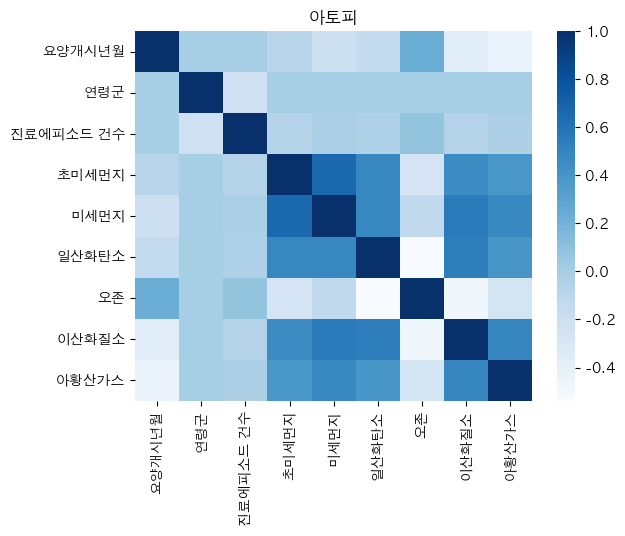

In [4]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = 아토피대기_df.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('아토피')
plt.show()

In [5]:
cor_target_abs0 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs0)

진료에피소드 건수    1.000000
연령군          0.214566
오존           0.085980
초미세먼지        0.073816
이산화질소        0.065201
일산화탄소        0.042953
아황산가스        0.030896
미세먼지         0.027409
요양개시년월       0.001680
Name: 진료에피소드 건수, dtype: float64


## 연령군 0

In [36]:
df_0 = 아토피대기_df.query('연령군 == 0')

In [37]:
df_0

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,201001,서울특별시,강남구,0,480,26,63,0.8,0.008,0.050,0.007
6,201001,서울특별시,강동구,0,512,27,49,0.5,0.010,0.040,0.010
12,201001,서울특별시,강북구,0,177,22,54,0.9,0.015,0.049,0.010
18,201001,서울특별시,강서구,0,598,27,62,0.8,0.010,0.048,0.009
24,201001,서울특별시,관악구,0,486,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...,...
21570,202112,서울특별시,관악구,0,162,22,36,0.7,0.012,0.035,0.003
21576,202112,서울특별시,서초구,0,205,23,36,0.5,0.015,0.031,0.003
21582,202112,서울특별시,강남구,0,277,20,36,0.5,0.014,0.029,0.003
21588,202112,서울특별시,송파구,0,384,22,38,0.6,0.012,0.034,0.004


In [38]:
df_0 = df_0.drop(['연령군'], axis=1)

In [39]:
df_0

,요양개시년월,주소(시도),주소(시군구),진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,201001,서울특별시,강남구,480,26,63,0.8,0.008,0.050,0.007
6,201001,서울특별시,강동구,512,27,49,0.5,0.010,0.040,0.010
12,201001,서울특별시,강북구,177,22,54,0.9,0.015,0.049,0.010
18,201001,서울특별시,강서구,598,27,62,0.8,0.010,0.048,0.009
24,201001,서울특별시,관악구,486,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...
21570,202112,서울특별시,관악구,162,22,36,0.7,0.012,0.035,0.003
21576,202112,서울특별시,서초구,205,23,36,0.5,0.015,0.031,0.003
21582,202112,서울특별시,강남구,277,20,36,0.5,0.014,0.029,0.003
21588,202112,서울특별시,송파구,384,22,38,0.6,0.012,0.034,0.004


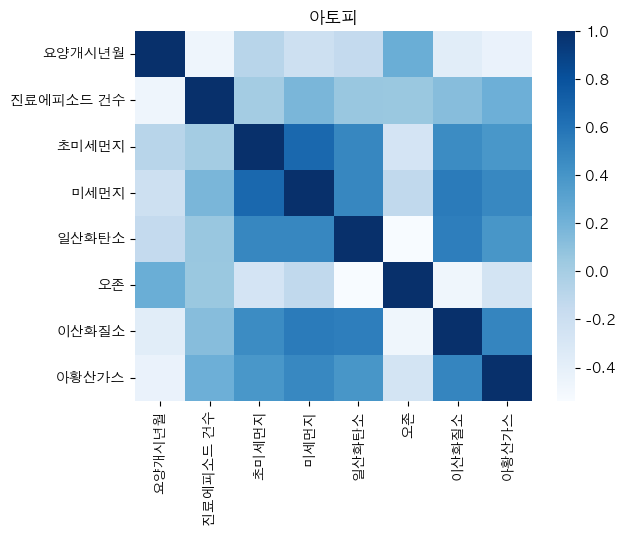

In [40]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_0.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('아토피')
plt.show()

In [41]:
cor_target_abs0 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs0)

진료에피소드 건수    1.000000
요양개시년월       0.460600
아황산가스        0.218981
미세먼지         0.174639
이산화질소        0.126953
일산화탄소        0.061468
오존           0.055463
초미세먼지        0.014083
Name: 진료에피소드 건수, dtype: float64


## 연령군 1

In [42]:
df_1 = 아토피대기_df.query('연령군 == 1')
df_1

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
1,201001,서울특별시,강남구,1,195,26,63,0.8,0.008,0.050,0.007
7,201001,서울특별시,강동구,1,273,27,49,0.5,0.010,0.040,0.010
13,201001,서울특별시,강북구,1,93,22,54,0.9,0.015,0.049,0.010
19,201001,서울특별시,강서구,1,238,27,62,0.8,0.010,0.048,0.009
25,201001,서울특별시,관악구,1,211,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...,...
21571,202112,서울특별시,관악구,1,103,22,36,0.7,0.012,0.035,0.003
21577,202112,서울특별시,서초구,1,166,23,36,0.5,0.015,0.031,0.003
21583,202112,서울특별시,강남구,1,232,20,36,0.5,0.014,0.029,0.003
21589,202112,서울특별시,송파구,1,265,22,38,0.6,0.012,0.034,0.004


In [43]:
df_1 = df_1.drop(['연령군'], axis=1)

In [44]:
df_1

,요양개시년월,주소(시도),주소(시군구),진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
1,201001,서울특별시,강남구,195,26,63,0.8,0.008,0.050,0.007
7,201001,서울특별시,강동구,273,27,49,0.5,0.010,0.040,0.010
13,201001,서울특별시,강북구,93,22,54,0.9,0.015,0.049,0.010
19,201001,서울특별시,강서구,238,27,62,0.8,0.010,0.048,0.009
25,201001,서울특별시,관악구,211,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...
21571,202112,서울특별시,관악구,103,22,36,0.7,0.012,0.035,0.003
21577,202112,서울특별시,서초구,166,23,36,0.5,0.015,0.031,0.003
21583,202112,서울특별시,강남구,232,20,36,0.5,0.014,0.029,0.003
21589,202112,서울특별시,송파구,265,22,38,0.6,0.012,0.034,0.004


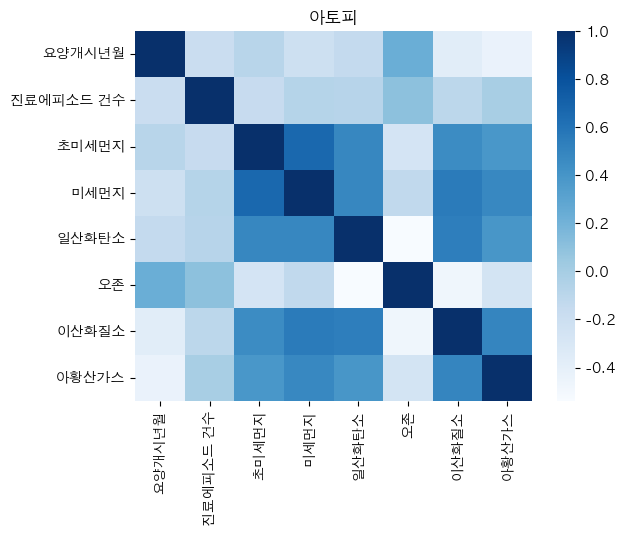

In [45]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_1.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('아토피')
plt.show()

In [46]:
cor_target_abs1 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs1)

진료에피소드 건수    1.000000
요양개시년월       0.183415
초미세먼지        0.154537
이산화질소        0.103890
오존           0.098795
일산화탄소        0.076926
미세먼지         0.069895
아황산가스        0.009360
Name: 진료에피소드 건수, dtype: float64


## 연령군 2

In [47]:
df_2 = 아토피대기_df.query('연령군 == 2')
df_2

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
2,201001,서울특별시,강남구,2,160,26,63,0.8,0.008,0.050,0.007
8,201001,서울특별시,강동구,2,143,27,49,0.5,0.010,0.040,0.010
14,201001,서울특별시,강북구,2,59,22,54,0.9,0.015,0.049,0.010
20,201001,서울특별시,강서구,2,97,27,62,0.8,0.010,0.048,0.009
26,201001,서울특별시,관악구,2,117,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...,...
21572,202112,서울특별시,관악구,2,57,22,36,0.7,0.012,0.035,0.003
21578,202112,서울특별시,서초구,2,149,23,36,0.5,0.015,0.031,0.003
21584,202112,서울특별시,강남구,2,175,20,36,0.5,0.014,0.029,0.003
21590,202112,서울특별시,송파구,2,145,22,38,0.6,0.012,0.034,0.004


In [48]:
df_2 = df_2.drop(['연령군'], axis=1)

In [49]:
df_2

,요양개시년월,주소(시도),주소(시군구),진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
2,201001,서울특별시,강남구,160,26,63,0.8,0.008,0.050,0.007
8,201001,서울특별시,강동구,143,27,49,0.5,0.010,0.040,0.010
14,201001,서울특별시,강북구,59,22,54,0.9,0.015,0.049,0.010
20,201001,서울특별시,강서구,97,27,62,0.8,0.010,0.048,0.009
26,201001,서울특별시,관악구,117,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...
21572,202112,서울특별시,관악구,57,22,36,0.7,0.012,0.035,0.003
21578,202112,서울특별시,서초구,149,23,36,0.5,0.015,0.031,0.003
21584,202112,서울특별시,강남구,175,20,36,0.5,0.014,0.029,0.003
21590,202112,서울특별시,송파구,145,22,38,0.6,0.012,0.034,0.004


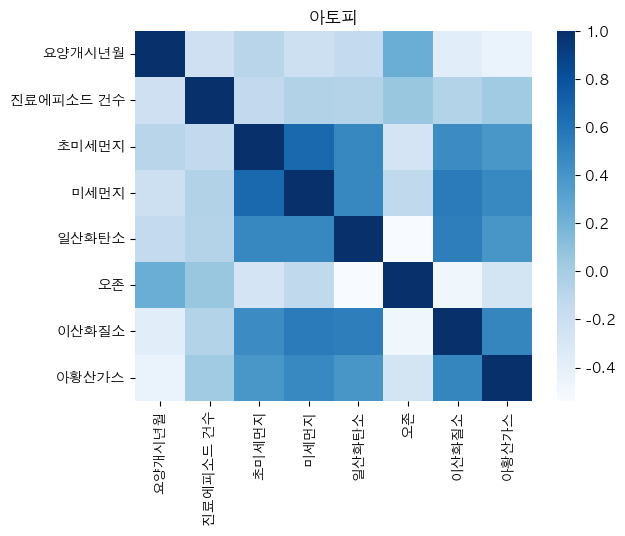

In [50]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_2.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('아토피')
plt.show()

In [51]:
cor_target_abs2 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs2)

진료에피소드 건수    1.000000
요양개시년월       0.215612
초미세먼지        0.134120
일산화탄소        0.069690
이산화질소        0.062622
오존           0.059163
미세먼지         0.055041
아황산가스        0.025320
Name: 진료에피소드 건수, dtype: float64


## 연령군 3

In [52]:
df_3 = 아토피대기_df.query('연령군 == 3')
df_3

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
3,201001,서울특별시,강남구,3,506,26,63,0.8,0.008,0.050,0.007
9,201001,서울특별시,강동구,3,379,27,49,0.5,0.010,0.040,0.010
15,201001,서울특별시,강북구,3,128,22,54,0.9,0.015,0.049,0.010
21,201001,서울특별시,강서구,3,329,27,62,0.8,0.010,0.048,0.009
27,201001,서울특별시,관악구,3,430,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...,...
21573,202112,서울특별시,관악구,3,718,22,36,0.7,0.012,0.035,0.003
21579,202112,서울특별시,서초구,3,612,23,36,0.5,0.015,0.031,0.003
21585,202112,서울특별시,강남구,3,754,20,36,0.5,0.014,0.029,0.003
21591,202112,서울특별시,송파구,3,1004,22,38,0.6,0.012,0.034,0.004


In [53]:
df_3 = df_3.drop(['연령군'], axis=1)

In [54]:
df_3

,요양개시년월,주소(시도),주소(시군구),진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
3,201001,서울특별시,강남구,506,26,63,0.8,0.008,0.050,0.007
9,201001,서울특별시,강동구,379,27,49,0.5,0.010,0.040,0.010
15,201001,서울특별시,강북구,128,22,54,0.9,0.015,0.049,0.010
21,201001,서울특별시,강서구,329,27,62,0.8,0.010,0.048,0.009
27,201001,서울특별시,관악구,430,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...
21573,202112,서울특별시,관악구,718,22,36,0.7,0.012,0.035,0.003
21579,202112,서울특별시,서초구,612,23,36,0.5,0.015,0.031,0.003
21585,202112,서울특별시,강남구,754,20,36,0.5,0.014,0.029,0.003
21591,202112,서울특별시,송파구,1004,22,38,0.6,0.012,0.034,0.004


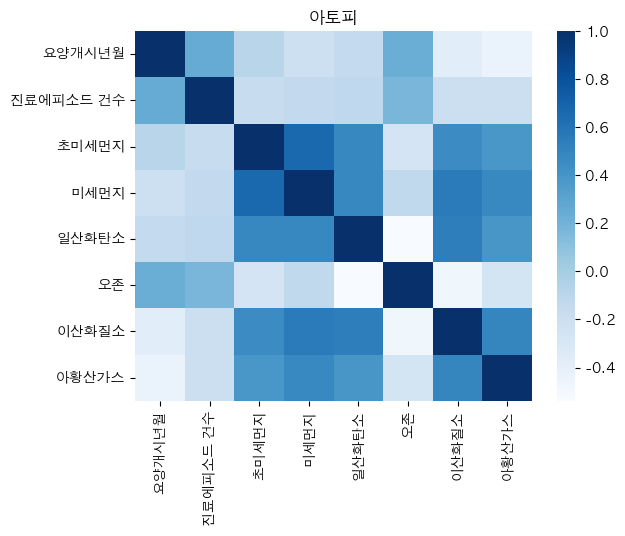

In [55]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_3.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('아토피')
plt.show()

In [56]:
cor_target_abs3 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs3)

진료에피소드 건수    1.000000
요양개시년월       0.251045
이산화질소        0.197315
아황산가스        0.197110
오존           0.172113
초미세먼지        0.168688
미세먼지         0.141428
일산화탄소        0.120260
Name: 진료에피소드 건수, dtype: float64


## 연령군 4

In [57]:
df_4 = 아토피대기_df.query('연령군 == 4')
df_4

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
4,201001,서울특별시,강남구,4,182,26,63,0.8,0.008,0.050,0.007
10,201001,서울특별시,강동구,4,146,27,49,0.5,0.010,0.040,0.010
16,201001,서울특별시,강북구,4,60,22,54,0.9,0.015,0.049,0.010
22,201001,서울특별시,강서구,4,149,27,62,0.8,0.010,0.048,0.009
28,201001,서울특별시,관악구,4,104,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...,...
21574,202112,서울특별시,관악구,4,188,22,36,0.7,0.012,0.035,0.003
21580,202112,서울특별시,서초구,4,293,23,36,0.5,0.015,0.031,0.003
21586,202112,서울특별시,강남구,4,347,20,36,0.5,0.014,0.029,0.003
21592,202112,서울특별시,송파구,4,466,22,38,0.6,0.012,0.034,0.004


In [58]:
df_4 = df_4.drop(['연령군'], axis=1)

In [59]:
df_4

,요양개시년월,주소(시도),주소(시군구),진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
4,201001,서울특별시,강남구,182,26,63,0.8,0.008,0.050,0.007
10,201001,서울특별시,강동구,146,27,49,0.5,0.010,0.040,0.010
16,201001,서울특별시,강북구,60,22,54,0.9,0.015,0.049,0.010
22,201001,서울특별시,강서구,149,27,62,0.8,0.010,0.048,0.009
28,201001,서울특별시,관악구,104,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...
21574,202112,서울특별시,관악구,188,22,36,0.7,0.012,0.035,0.003
21580,202112,서울특별시,서초구,293,23,36,0.5,0.015,0.031,0.003
21586,202112,서울특별시,강남구,347,20,36,0.5,0.014,0.029,0.003
21592,202112,서울특별시,송파구,466,22,38,0.6,0.012,0.034,0.004


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 문자열이 포함된 특징('주소') 제외하기
df_no_object = df_4.drop(['주소(시도)', '주소(시군구)', '요양개시년월'], axis=1)

print(df_no_object)
# 데이터 분리 ('Life expectancy'를 제외한 특징들을 입력 변수로 정의함.) 
X_train, X_test, y_train, y_test = train_test_split(df_no_object.loc[:, df_no_object.columns !='진료에피소드 건수'], df_no_object['진료에피소드 건수'], test_size=.33, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# r2 score 계산
r2 = r2_score(y_test, y_pred)

# 결과 출력
print('r2 score :' + str(r2))

       진료에피소드 건수  초미세먼지  미세먼지  일산화탄소     오존  이산화질소  아황산가스
4            182     26    63    0.8  0.008  0.050  0.007
10           146     27    49    0.5  0.010  0.040  0.010
16            60     22    54    0.9  0.015  0.049  0.010
22           149     27    62    0.8  0.010  0.048  0.009
28           104     19    64    0.9  0.009  0.044  0.006
...          ...    ...   ...    ...    ...    ...    ...
21574        188     22    36    0.7  0.012  0.035  0.003
21580        293     23    36    0.5  0.015  0.031  0.003
21586        347     20    36    0.5  0.014  0.029  0.003
21592        466     22    38    0.6  0.012  0.034  0.004
21598        348     24    42    0.5  0.011  0.030  0.003

[3600 rows x 7 columns]
r2 score :0.05967111860070762


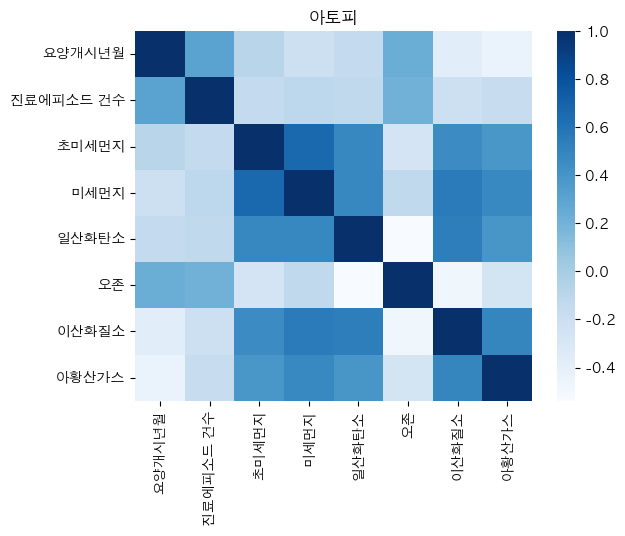

In [61]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_4.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('아토피')
plt.show()

In [62]:
cor_target_abs4 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs4)

진료에피소드 건수    1.000000
요양개시년월       0.312145
오존           0.210868
이산화질소        0.208777
아황산가스        0.170970
초미세먼지        0.142779
일산화탄소        0.127804
미세먼지         0.110590
Name: 진료에피소드 건수, dtype: float64


## 연령군 5

In [63]:
df_5 = 아토피대기_df.query('연령군 == 5')
df_5

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
5,201001,서울특별시,강남구,5,62,26,63,0.8,0.008,0.050,0.007
11,201001,서울특별시,강동구,5,44,27,49,0.5,0.010,0.040,0.010
17,201001,서울특별시,강북구,5,28,22,54,0.9,0.015,0.049,0.010
23,201001,서울특별시,강서구,5,83,27,62,0.8,0.010,0.048,0.009
29,201001,서울특별시,관악구,5,72,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...,...
21575,202112,서울특별시,관악구,5,144,22,36,0.7,0.012,0.035,0.003
21581,202112,서울특별시,서초구,5,188,23,36,0.5,0.015,0.031,0.003
21587,202112,서울특별시,강남구,5,193,20,36,0.5,0.014,0.029,0.003
21593,202112,서울특별시,송파구,5,257,22,38,0.6,0.012,0.034,0.004


In [64]:
df_5 = df_5.drop(['연령군'], axis=1)

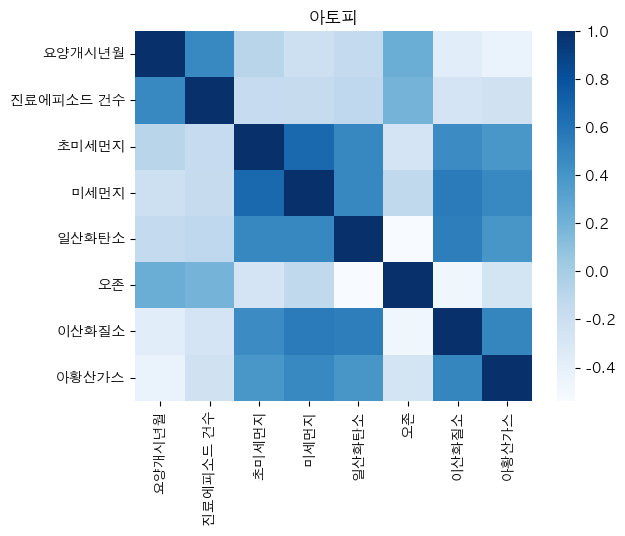

In [65]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_5.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('아토피')
plt.show()

In [66]:
cor_target_abs5 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs5)

진료에피소드 건수    1.000000
요양개시년월       0.480399
이산화질소        0.263377
아황산가스        0.232287
오존           0.192094
미세먼지         0.159157
초미세먼지        0.149570
일산화탄소        0.119916
Name: 진료에피소드 건수, dtype: float64


In [33]:
df_5 = 비염대기_df.query('연령군 == 5')
df_5

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
5,201001,서울특별시,강남구,5,1609,26,63,0.8,0.008,0.050,0.007
11,201001,서울특별시,강동구,5,1307,27,49,0.5,0.010,0.040,0.010
17,201001,서울특별시,강북구,5,869,22,54,0.9,0.015,0.049,0.010
23,201001,서울특별시,강서구,5,1687,27,62,0.8,0.010,0.048,0.009
29,201001,서울특별시,관악구,5,2023,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...,...
21575,202112,서울특별시,관악구,5,2130,22,36,0.7,0.012,0.035,0.003
21581,202112,서울특별시,서초구,5,1260,23,36,0.5,0.015,0.031,0.003
21587,202112,서울특별시,강남구,5,1753,20,36,0.5,0.014,0.029,0.003
21593,202112,서울특별시,송파구,5,2659,22,38,0.6,0.012,0.034,0.004


In [34]:
df_5 = df_5.drop(['연령군'], axis=1)
df_5

,요양개시년월,주소(시도),주소(시군구),진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
5,201001,서울특별시,강남구,1609,26,63,0.8,0.008,0.050,0.007
11,201001,서울특별시,강동구,1307,27,49,0.5,0.010,0.040,0.010
17,201001,서울특별시,강북구,869,22,54,0.9,0.015,0.049,0.010
23,201001,서울특별시,강서구,1687,27,62,0.8,0.010,0.048,0.009
29,201001,서울특별시,관악구,2023,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...
21575,202112,서울특별시,관악구,2130,22,36,0.7,0.012,0.035,0.003
21581,202112,서울특별시,서초구,1260,23,36,0.5,0.015,0.031,0.003
21587,202112,서울특별시,강남구,1753,20,36,0.5,0.014,0.029,0.003
21593,202112,서울특별시,송파구,2659,22,38,0.6,0.012,0.034,0.004


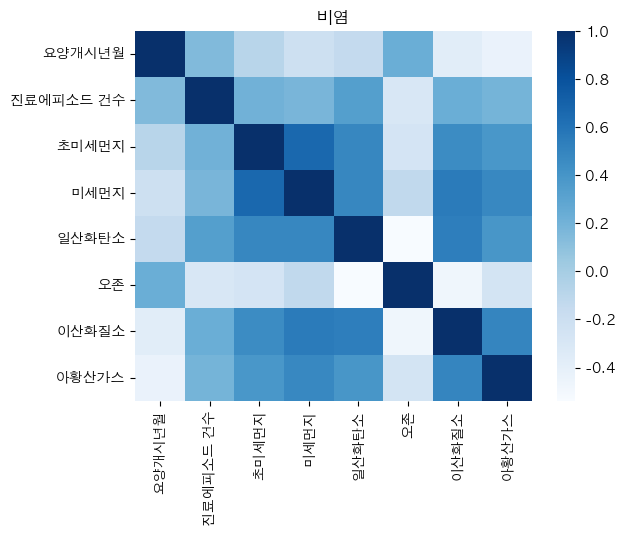

In [35]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_5.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('비염')
plt.show()

In [36]:
cor_target_abs5 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs5)

진료에피소드 건수    1.000000
일산화탄소        0.334790
오존           0.297935
이산화질소        0.233068
초미세먼지        0.211266
아황산가스        0.192263
미세먼지         0.182405
요양개시년월       0.152388
Name: 진료에피소드 건수, dtype: float64


In [ ]:
연령군 4
df_4 = 비염대기_df.query('연령군 == 4')
df_4
df_4 = df_4.drop(['연령군'], axis=1)
df_4
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_4.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('비염')
plt.show()
cor_target_abs4 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs4)
cor_target_abs4 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs4)

In [10]:
!pip install -U scikit-learn

In [12]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 2.2 MB/s eta 0:00:00a 0:00:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 문자열이 포함된 특징('주소') 제외하기
df_no_object = 비염대기_df.drop(['주소(시도)', '주소(시군구)'], axis=1)

# 데이터 분리 ('Life expectancy'를 제외한 특징들을 입력 변수로 정의함.) 
X_train, X_test, y_train, y_test = train_test_split(df_no_object.loc[:, df_no_object.columns !='진료에피소드 건수'], df_no_object['진료에피소드 건수'], test_size=.33, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# r2 score 계산
r2 = r2_score(y_test, y_pred)

# 결과 출력
print('r2 score :' + str(r2))

r2 score :0.1045382317828657


In [20]:
index = 비염대기_df[비염대기_df['요양개시년월'] >= 202001].index

In [21]:
print(index)

Index([18000, 18001, 18002, 18003, 18004, 18005, 18006, 18007, 18008, 18009,
       ...
       21590, 21591, 21592, 21593, 21594, 21595, 21596, 21597, 21598, 21599],
      dtype='int64', length=3600)


In [22]:
df_2019 = 비염대기_df.drop(index)

In [23]:
df_2019

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,201001,서울특별시,강남구,0,1195,26,63,0.8,0.008,0.050,0.007
1,201001,서울특별시,강남구,1,1252,26,63,0.8,0.008,0.050,0.007
2,201001,서울특별시,강남구,2,1382,26,63,0.8,0.008,0.050,0.007
3,201001,서울특별시,강남구,3,8087,26,63,0.8,0.008,0.050,0.007
4,201001,서울특별시,강남구,4,4761,26,63,0.8,0.008,0.050,0.007
...,...,...,...,...,...,...,...,...,...,...,...
17995,201912,서울특별시,강동구,1,2035,36,48,0.6,0.009,0.036,0.003
17996,201912,서울특별시,강동구,2,1632,36,48,0.6,0.009,0.036,0.003
17997,201912,서울특별시,강동구,3,7962,36,48,0.6,0.009,0.036,0.003
17998,201912,서울특별시,강동구,4,5905,36,48,0.6,0.009,0.036,0.003


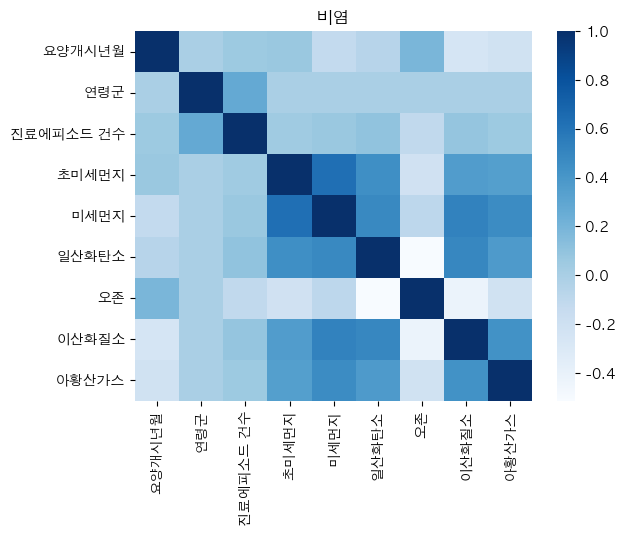

In [26]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_2019.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('비염')
plt.show()

In [27]:
cor_target_abs2 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs2)

진료에피소드 건수    1.000000
연령군          0.278278
오존           0.107929
일산화탄소        0.105433
이산화질소        0.083503
미세먼지         0.070112
아황산가스        0.058304
요양개시년월       0.057831
초미세먼지        0.044626
Name: 진료에피소드 건수, dtype: float64


In [28]:
비염대기_df

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,201001,서울특별시,강남구,0,1195,26,63,0.8,0.008,0.05,0.007
1,201001,서울특별시,강남구,1,1252,26,63,0.8,0.008,0.05,0.007
2,201001,서울특별시,강남구,2,1382,26,63,0.8,0.008,0.05,0.007
3,201001,서울특별시,강남구,3,8087,26,63,0.8,0.008,0.05,0.007
4,201001,서울특별시,강남구,4,4761,26,63,0.8,0.008,0.05,0.007
...,...,...,...,...,...,...,...,...,...,...,...
21595,202112,서울특별시,강동구,1,1315,24,42,0.5,0.011,0.03,0.003
21596,202112,서울특별시,강동구,2,730,24,42,0.5,0.011,0.03,0.003
21597,202112,서울특별시,강동구,3,3964,24,42,0.5,0.011,0.03,0.003
21598,202112,서울특별시,강동구,4,2822,24,42,0.5,0.011,0.03,0.003


In [29]:
cols = ['요양개시년월', '주소(시도)', '주소(시군구)', '연령군', '진료에피소드 건수', '초미세먼지', '미세먼지', '일산화탄소', '오존', '이산화질소', '아황산가스']

In [41]:
cols = ['요양개시년월','연령군', '진료에피소드 건수', '초미세먼지', '미세먼지', '일산화탄소', '오존', '이산화질소', '아황산가스']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

비염대기_df[cols] = scaler.fit_transform(비염대기_df[cols])
# print(out_scaled)

비염대기_df

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,0.0,서울특별시,강남구,0.0,0.076734,0.42,0.213115,0.636364,0.0625,0.836364,0.6
1,0.0,서울특별시,강남구,0.2,0.080518,0.42,0.213115,0.636364,0.0625,0.836364,0.6
2,0.0,서울특별시,강남구,0.4,0.089147,0.42,0.213115,0.636364,0.0625,0.836364,0.6
3,0.0,서울특별시,강남구,0.6,0.534218,0.42,0.213115,0.636364,0.0625,0.836364,0.6
4,0.0,서울특별시,강남구,0.8,0.313442,0.42,0.213115,0.636364,0.0625,0.836364,0.6
...,...,...,...,...,...,...,...,...,...,...,...
21595,1.0,서울특별시,강동구,0.2,0.084700,0.38,0.127049,0.363636,0.1250,0.472727,0.2
21596,1.0,서울특별시,강동구,0.4,0.045868,0.38,0.127049,0.363636,0.1250,0.472727,0.2
21597,1.0,서울특별시,강동구,0.6,0.260538,0.38,0.127049,0.363636,0.1250,0.472727,0.2
21598,1.0,서울특별시,강동구,0.8,0.184733,0.38,0.127049,0.363636,0.1250,0.472727,0.2


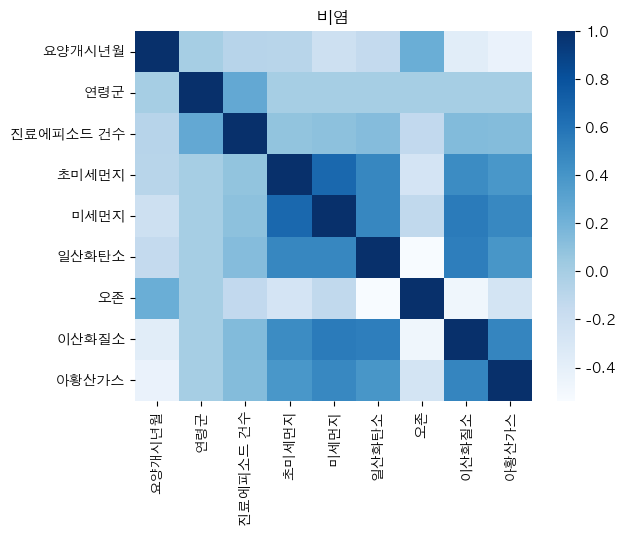

In [42]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = 비염대기_df.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('비염')
plt.show()

In [40]:
비염대기_df

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,0.0,서울특별시,강남구,0.0,0.076734,0.42,0.213115,0.636364,0.0625,0.836364,0.6
1,0.0,서울특별시,강남구,0.2,0.080518,0.42,0.213115,0.636364,0.0625,0.836364,0.6
2,0.0,서울특별시,강남구,0.4,0.089147,0.42,0.213115,0.636364,0.0625,0.836364,0.6
3,0.0,서울특별시,강남구,0.6,0.534218,0.42,0.213115,0.636364,0.0625,0.836364,0.6
4,0.0,서울특별시,강남구,0.8,0.313442,0.42,0.213115,0.636364,0.0625,0.836364,0.6
...,...,...,...,...,...,...,...,...,...,...,...
21595,1.0,서울특별시,강동구,0.2,0.084700,0.38,0.127049,0.363636,0.1250,0.472727,0.2
21596,1.0,서울특별시,강동구,0.4,0.045868,0.38,0.127049,0.363636,0.1250,0.472727,0.2
21597,1.0,서울특별시,강동구,0.6,0.260538,0.38,0.127049,0.363636,0.1250,0.472727,0.2
21598,1.0,서울특별시,강동구,0.8,0.184733,0.38,0.127049,0.363636,0.1250,0.472727,0.2


In [43]:
cor_target_abs2 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs2)

진료에피소드 건수    1.000000
연령군          0.268376
이산화질소        0.141139
아황산가스        0.134937
일산화탄소        0.133359
오존           0.132103
미세먼지         0.102924
초미세먼지        0.081176
요양개시년월       0.079347
Name: 진료에피소드 건수, dtype: float64


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 문자열이 포함된 특징('주소') 제외하기
df_no_object = 비염대기_df.drop(['주소(시도)', '주소(시군구)'], axis=1)

print(비염대기_df)

# 데이터 분리 ('Life expectancy'를 제외한 특징들을 입력 변수로 정의함.) 
X_train, X_test, y_train, y_test = train_test_split(df_no_object.loc[:, df_no_object.columns !='진료에피소드 건수'], df_no_object['진료에피소드 건수'], test_size=.33, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# r2 score 계산
r2 = r2_score(y_test, y_pred)

# 결과 출력
print('r2 score :' + str(r2))

       요양개시년월 주소(시도) 주소(시군구)  연령군  진료에피소드 건수  초미세먼지      미세먼지     일산화탄소   
0         0.0  서울특별시     강남구  0.0   0.076734   0.42  0.213115  0.636364  \
1         0.0  서울특별시     강남구  0.2   0.080518   0.42  0.213115  0.636364   
2         0.0  서울특별시     강남구  0.4   0.089147   0.42  0.213115  0.636364   
3         0.0  서울특별시     강남구  0.6   0.534218   0.42  0.213115  0.636364   
4         0.0  서울특별시     강남구  0.8   0.313442   0.42  0.213115  0.636364   
...       ...    ...     ...  ...        ...    ...       ...       ...   
21595     1.0  서울특별시     강동구  0.2   0.084700   0.38  0.127049  0.363636   
21596     1.0  서울특별시     강동구  0.4   0.045868   0.38  0.127049  0.363636   
21597     1.0  서울특별시     강동구  0.6   0.260538   0.38  0.127049  0.363636   
21598     1.0  서울특별시     강동구  0.8   0.184733   0.38  0.127049  0.363636   
21599     1.0  서울특별시     강동구  1.0   0.120345   0.38  0.127049  0.363636   

           오존     이산화질소  아황산가스  
0      0.0625  0.836364    0.6  
1      0.0625  0.836364    0.6  
